In [690]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# roc curve and auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler

In [691]:
import yfinance as yf

In [692]:
# Import Google Stock data
df = yf.download('GOOG', start='2015-01-01',end='2021-12-31',progress=False)

In [693]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582
...,...,...,...,...,...,...
2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690900
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200


In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


In [695]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,1221.600090,1233.260304,1210.550251,1222.418766,1222.418766,1.670640e+06
std,612.071235,617.761268,606.994075,612.695117,612.695117,8.151896e+05
min,493.295654,494.618011,486.225067,491.201416,491.201416,3.468000e+05
25%,774.312500,779.562515,768.971237,772.955002,772.955002,1.188700e+06
50%,1083.015015,1094.207520,1071.102478,1082.619995,1082.619995,1.466400e+06
75%,1391.759979,1412.464996,1378.537994,1393.992462,1393.992462,1.907000e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,1.116490e+07


In [696]:
df.shape

(1762, 6)

In [697]:
data = df

In [698]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Date'>

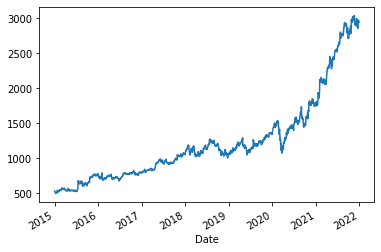

In [699]:
tmp = data.iloc[-1764:]
tmp['High'].plot()

# Strategy - 1

In [700]:
data = df.copy()
data["y"] = np.where(data["Close"].shift(-1) > data["Close"], 1, -1)

In [701]:
data = data.rename(columns={"Close":"Close"})
data

,Open,High,Low,Close,Adj Close,Volume,y
Date,,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563,-1
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840,-1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,-1
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054,1
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582,-1
...,...,...,...,...,...,...,...
2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690900,1
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800,-1
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200,1


# Strategy - 2

In [702]:
data2 = df.copy()
data2["50_sma"] = data2["Adj Close"].rolling(50).mean()
data2["200_sma"] = data2["Adj Close"].rolling(200).mean()

data2 = data2.dropna() 
data2["signal"] = data2.apply(lambda row: 1 if row[f"50_sma"] > row[f"200_sma"]  else 0, axis=1)


In [703]:
data2

,Open,High,Low,Close,Adj Close,Volume,50_sma,200_sma,signal
Date,,,,,,,,,
2015-10-16,664.109985,664.969971,657.200012,662.200012,662.200012,1611100,630.552394,567.525658,1
2015-10-19,661.179993,666.820007,659.580017,666.099976,666.099976,1477300,631.168394,568.239293,1
2015-10-20,664.039978,664.719971,644.195007,650.280029,650.280029,2498200,631.499395,568.928378,1
2015-10-21,654.150024,655.869995,641.729980,642.609985,642.609985,1791100,631.135994,569.638499,1
2015-10-22,646.700012,657.799988,644.010010,651.789978,651.789978,4071000,630.980593,570.398809,1
...,...,...,...,...,...,...,...,...,...
2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690900,2912.677207,2628.971300,1
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800,2915.338008,2633.468101,1
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200,2917.247207,2637.780450,1


In [764]:
list_golden_cross_ts = []
first_golden_cross = False

In [766]:
for idx, each in data2['signal'].iteritems():
    if each == 1:
        # If its the first golden cross we see we add the timestamp
        if first_golden_cross:
            list_golden_cross_ts.append(idx)
            first_golden_cross = False
    else:
        first_golden_cross = True

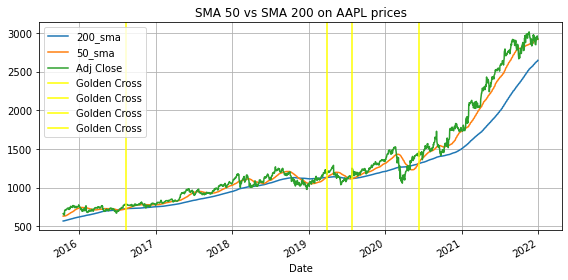

In [768]:
fig, axes = plt.subplots(1,1, figsize=(8,4))
data2[["200_sma","50_sma","Adj Close"]].plot(figsize=(8,4), grid=True, title="SMA 50 vs SMA 200 on AAPL prices", ax=axes)

for each in list_golden_cross_ts:
    axes.axvline(x=each, label="Golden Cross", c="yellow")
    
axes.legend()
fig.tight_layout()

# Spilting Data Strategy 1

In [704]:
training_set = data.iloc[:,1:2].values

In [705]:
training_set

array([[ 529.81536865],
       [ 522.89440918],
       [ 514.76171875],
       ...,
       [2967.48999023],
       [2943.67504883],
       [2941.25      ]])

In [706]:
training_set.shape

(1762, 1)

In [707]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.01384424],
       [0.01112201],
       [0.00792316],
       ...,
       [0.97265949],
       [0.96329232],
       [0.96233847]])

In [708]:
data

,Open,High,Low,Close,Adj Close,Volume,y
Date,,,,,,,
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447563,-1
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059840,-1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,-1
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065054,1
2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353582,-1
...,...,...,...,...,...,...,...
2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690900,1
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800,-1
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200,1


In [709]:
#define_predictors
X = data.drop(columns = ["y"])
#define output variable
y = data["y"]

In [710]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
print(f"No. of training examples:{X_train.shape[0]}")
print(f"No. of testing examples:{X_test.shape[0]}")

No. of training examples:1409
No. of testing examples:353


# 1. K-Nearest Neighbors (KNN)


In [711]:
#Fit the model in training set and using scalar transform
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [712]:
#using classifiers/model knn = 5
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [713]:
#Making the prediction system using classifier and prediction
y_pred = classifier.predict(X_test)

In [714]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
knn_result = accuracy_score(y_test,y_pred)
print("Accuracy:",knn_result*100)

Confusion Matrix:
[[ 74  79]
 [ 83 117]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.48      0.48       153
           1       0.60      0.58      0.59       200

    accuracy                           0.54       353
   macro avg       0.53      0.53      0.53       353
weighted avg       0.54      0.54      0.54       353

Accuracy: 54.107648725212464


AUC: 0.54


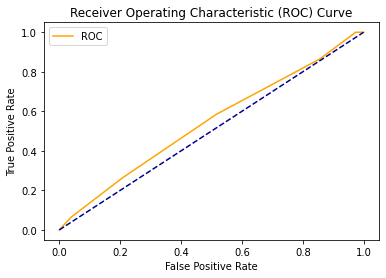

In [715]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = KNeighborsClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 2. Random Forest (RF)

In [716]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [717]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [718]:
#fit the model on train dataset
model.fit(X_train, y_train)


y_pred =  model.predict(X_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
rf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",rf_result*100)

Confusion Matrix:
[[ 74  79]
 [ 83 117]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.47      0.48      0.48       153
           1       0.60      0.58      0.59       200

    accuracy                           0.54       353
   macro avg       0.53      0.53      0.53       353
weighted avg       0.54      0.54      0.54       353

Accuracy: 54.107648725212464


AUC: 0.51


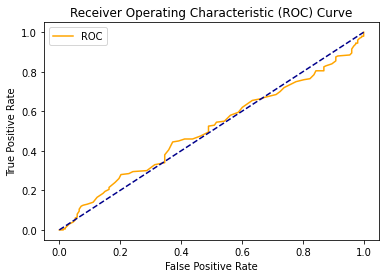

In [719]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = RandomForestClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 3. Gradient Boosting

In [720]:
from sklearn.ensemble import GradientBoostingClassifier

In [721]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

In [722]:
#fit the model on train dataset
model.fit(X_train, y_train)

y_pred =  model.predict(X_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
clf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",clf_result*100)

Confusion Matrix:
[[ 60  93]
 [ 84 116]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.42      0.39      0.40       153
           1       0.56      0.58      0.57       200

    accuracy                           0.50       353
   macro avg       0.49      0.49      0.49       353
weighted avg       0.50      0.50      0.50       353

Accuracy: 49.858356940509914


AUC: 0.46


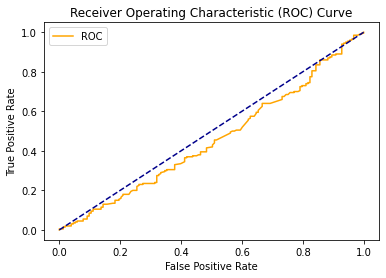

In [723]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = GradientBoostingClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 4. Support Vector Machine (SVM)

In [724]:
from sklearn.svm import SVC

In [725]:
from sklearn.svm import SVC
svm = SVC (kernel="linear", C=0.025, random_state=101)
svm.fit(X_train, y_train)
y_pred=svm.predict(X_test)

In [726]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
svm_result = accuracy_score(y_test,y_pred)
print("Accuracy:",svm_result*100)

Confusion Matrix:
[[  0 153]
 [  0 200]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       153
           1       0.57      1.00      0.72       200

    accuracy                           0.57       353
   macro avg       0.28      0.50      0.36       353
weighted avg       0.32      0.57      0.41       353

Accuracy: 56.657223796033996


C:\Users\soham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.50


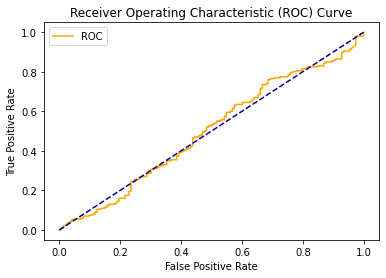

In [727]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

model = SVC(probability=True)
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

    
    
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 5. XGBoost Algorithm (XGB)

In [728]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred =  model.predict(X_test)

[20:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [729]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
xgb_result = accuracy_score(y_test,y_pred)
print("Accuracy:",xgb_result*100)

Confusion Matrix:
[[ 62  91]
 [ 85 115]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.42      0.41      0.41       153
           1       0.56      0.57      0.57       200

    accuracy                           0.50       353
   macro avg       0.49      0.49      0.49       353
weighted avg       0.50      0.50      0.50       353

Accuracy: 50.14164305949008


[20:29:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC: 0.48


C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


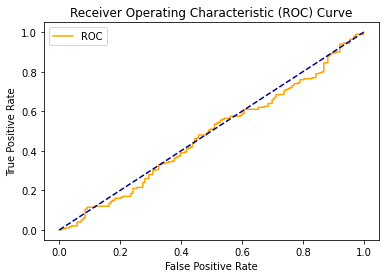

In [730]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = XGBClassifier()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Comparing ML Classifier Models

In [731]:
results_123 = pd.DataFrame([

    {'Algorithm' : 'K-Nearest Neighbors (KNN)', 'Accuracy' : knn_result*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : rf_result*100},
    
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : clf_result*100},
    
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : svm_result*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : xgb_result*100}
    
   

])

results_123.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
3,Support Vector Machine,56.657224
0,K-Nearest Neighbors (KNN),54.107649
1,Random Forest,54.107649
4,XGBoost Algorithm (XGB),50.141643
2,Gradient Boosting,49.858357


# Spliting Data Strategy 2

In [732]:
training_set = data2.iloc[:,1:2].values

In [733]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.0038217 ],
       [0.00459866],
       [0.00371671],
       ...,
       [0.97080797],
       [0.96080644],
       [0.959788  ]])

In [734]:
data2

,Open,High,Low,Close,Adj Close,Volume,50_sma,200_sma,signal
Date,,,,,,,,,
2015-10-16,664.109985,664.969971,657.200012,662.200012,662.200012,1611100,630.552394,567.525658,1
2015-10-19,661.179993,666.820007,659.580017,666.099976,666.099976,1477300,631.168394,568.239293,1
2015-10-20,664.039978,664.719971,644.195007,650.280029,650.280029,2498200,631.499395,568.928378,1
2015-10-21,654.150024,655.869995,641.729980,642.609985,642.609985,1791100,631.135994,569.638499,1
2015-10-22,646.700012,657.799988,644.010010,651.789978,651.789978,4071000,630.980593,570.398809,1
...,...,...,...,...,...,...,...,...,...
2021-12-23,2941.790039,2971.451904,2939.017090,2942.850098,2942.850098,690900,2912.677207,2628.971300,1
2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800,2915.338008,2633.468101,1
2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200,2917.247207,2637.780450,1


In [735]:
x= data2.iloc[:, :-3]
y= data2.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x, y,test_size= 0.2,shuffle= True,random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [736]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)
print(f"No. of training examples:{x_train.shape[0]}")
print(f"No. of testing examples:{x_test.shape[0]}")

No. of training examples:1250
No. of testing examples:313


# 1. K-Nearest Neighbors (KNN)

In [737]:
#Fit the model in training set and using scalar transform
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [738]:
#using classifiers/model knn = 5
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [739]:
#Making the prediction system using classifier and prediction
y_pred = classifier.predict(x_test)

In [740]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
knn_result = accuracy_score(y_test,y_pred)
print("Accuracy:",knn_result*100)

Confusion Matrix:
[[  2  30]
 [ 11 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.06      0.09        32
           1       0.90      0.96      0.93       281

    accuracy                           0.87       313
   macro avg       0.53      0.51      0.51       313
weighted avg       0.82      0.87      0.84       313

Accuracy: 86.90095846645367


AUC: 0.70


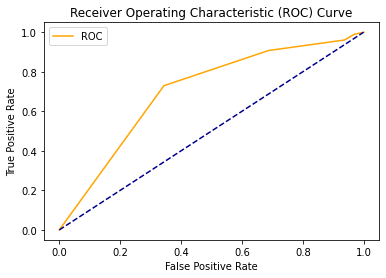

In [741]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = KNeighborsClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 2. Random Forest (RF)

In [742]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [743]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

In [744]:
#fit the model on train dataset
model.fit(x_train, y_train)

#predict infection rate on 30% test data
y_pred =  model.predict(x_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
rf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",rf_result*100)

Confusion Matrix:
[[  2  30]
 [ 11 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.06      0.09        32
           1       0.90      0.96      0.93       281

    accuracy                           0.87       313
   macro avg       0.53      0.51      0.51       313
weighted avg       0.82      0.87      0.84       313

Accuracy: 86.90095846645367


AUC: 0.77


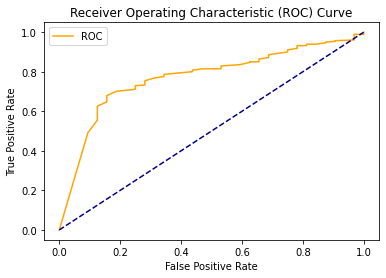

In [745]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = RandomForestClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 3. Gradient Boosting

In [746]:
from sklearn.ensemble import GradientBoostingClassifier

In [747]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)

In [748]:
#fit the model on train dataset
model.fit(x_train, y_train)

y_pred =  model.predict(x_test)

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
clf_result = accuracy_score(y_test,y_pred)
print("Accuracy:",clf_result*100)

Confusion Matrix:
[[  0  32]
 [ 11 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.89      0.96      0.93       281

    accuracy                           0.86       313
   macro avg       0.45      0.48      0.46       313
weighted avg       0.80      0.86      0.83       313

Accuracy: 86.26198083067092


AUC: 0.76


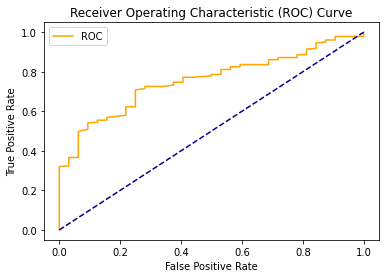

In [749]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = GradientBoostingClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 4. Support Vector Machine (SVM)

In [750]:
from sklearn.svm import SVC

In [751]:
from sklearn.svm import SVC
svm = SVC (kernel="linear", C=0.025, random_state=101)
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

In [752]:
#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
svm_result = accuracy_score(y_test,y_pred)
print("Accuracy:",svm_result*100)

Confusion Matrix:
[[  0  32]
 [  0 281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.90      1.00      0.95       281

    accuracy                           0.90       313
   macro avg       0.45      0.50      0.47       313
weighted avg       0.81      0.90      0.85       313

Accuracy: 89.77635782747603


C:\Users\soham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.55


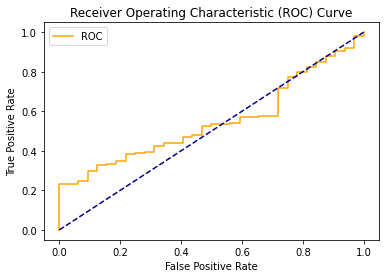

In [753]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

model = SVC(probability=True)
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

    
    
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# 5. XGBoost Algorithm (XGB)

In [754]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred =  model.predict(x_test)

[20:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [755]:

#printing confusion matrix and model Accuracy
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
xgb_result = accuracy_score(y_test,y_pred)
print("Accuracy:",xgb_result*100)

Confusion Matrix:
[[  4  28]
 [ 11 270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.12      0.17        32
           1       0.91      0.96      0.93       281

    accuracy                           0.88       313
   macro avg       0.59      0.54      0.55       313
weighted avg       0.84      0.88      0.85       313

Accuracy: 87.53993610223642


[20:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soham\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


AUC: 0.78


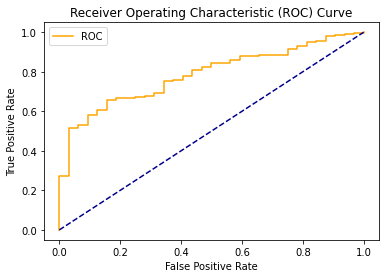

In [756]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


model = XGBClassifier()
model.fit(x_train, y_train)

probs = model.predict_proba(x_test)

probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# Comparing ML Classifier Models

In [761]:
results_123 = pd.DataFrame([

    {'Algorithm' : 'K-Nearest Neighbors (KNN)', 'Accuracy' : knn_result*100},
    
    {'Algorithm' : 'Random Forest', 'Accuracy' : rf_result*100},
    
    {'Algorithm' : 'Gradient Boosting', 'Accuracy' : clf_result*100},
    
    {'Algorithm' : 'Support Vector Machine', 'Accuracy' : svm_result*100},
    
    {'Algorithm' : 'XGBoost Algorithm (XGB)', 'Accuracy' : xgb_result*100}
    
   

])

results_123.sort_values(by=['Accuracy'], ascending=False)

,Algorithm,Accuracy
3,Support Vector Machine,89.776358
4,XGBoost Algorithm (XGB),87.539936
0,K-Nearest Neighbors (KNN),86.900958
1,Random Forest,86.900958
2,Gradient Boosting,86.261981


# Tunning Parameters

In [769]:
model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model=model.fit(x_train,y_train)
result=model.predict(x_test)
dt_result = accuracy_score(y_test,y_pred)
print("Accuracy:",dt_result*100)

Accuracy: 87.53993610223642
